# Tutorial notebook

This notebook is to demonstrate the function of modules and how they work together.

### Step 1: argument file reader

In [1]:
# read local file into data frame
from orangecontrib.argument.miner.reader import read_json_file, validate

fpath = "../example/data/data_processed_1prod_full.json"

df_arguments = read_json_file(fpath)
df_arguments

,reviewText,overall,vote
0,I always get a half size up in my tennis shoes...,3,7.0
1,Put them on and walked 3 hours with no problem...,5,NaN
2,excelente,5,NaN
3,The shoes fit well in the arch area. They are ...,4,NaN
4,Tried them on in a store before buying online ...,5,22.0
...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,NaN
367,"I wear these everyday to work, the gym, etc.",5,NaN
368,"Love these shoes! Great fit, very light weight.",5,NaN
369,Super comfortable and fit my small feet perfec...,5,NaN


In [2]:
# select desired columns and validate data
df_arguments = df_arguments[["reviewText", "overall"]]
df_arguments = validate(df_arguments)
df_arguments

,argument,score
0,I always get a half size up in my tennis shoes...,3
1,Put them on and walked 3 hours with no problem...,5
2,excelente,5
3,The shoes fit well in the arch area. They are ...,4
4,Tried them on in a store before buying online ...,5
...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5
367,"I wear these everyday to work, the gym, etc.",5
368,"Love these shoes! Great fit, very light weight.",5
369,Super comfortable and fit my small feet perfec...,5


### Step 2: argument chunking


In [3]:
from orangecontrib.argument.miner.chunker import ArgumentChunker

chunker = ArgumentChunker(df_arguments["argument"])
df_chunks = chunker.get_chunk_table()
df_topics = chunker.get_topic_table()

/home/jqi/Workspace/orange3-argument/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jqi/Workspace/orange3-argument/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jqi/Workspace/orange3-argument/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is curre

In [4]:
df_chunks

,argument_id,chunk,topic,rank,polarity_score
0,0,I always get a half size up in my tennis shoes .,31,0.500000,-0.166667
1,0,For some reason these feel to big in the heel ...,12,0.500000,-0.050000
2,1,walked 3 hours with no problem,-1,0.249692,0.000000
3,1,Put them on and !,26,0.255780,0.000000
4,1,Love them !,0,0.240738,0.625000
...,...,...,...,...,...
1193,369,I can wear the shoe all day long and,26,0.124998,-0.050000
1194,369,they are easy to clean compared to other shoes...,-1,0.126181,0.225000
1195,369,They are light colored so any dirt will be see...,-1,0.126364,0.342857
1196,369,Would definitely buy another pair in a differe...,23,0.124135,0.000000


In [5]:
df_topics

,topic,count,name,Representation,Representative_Docs,keywords,keyword_scores
0,-1,165,-1_compared_expensive_cushioning_problem,"[compared, expensive, cushioning, problem, mak...",[This is the optimal sneaker that is flexible ...,"['compared', 'expensive', 'cushioning', 'probl...","[0.2621073583121895, 0.24506895360581363, 0.24..."
1,0,73,0_favorite_amazing_absolute_turned,"[favorite, amazing, absolute, turned, love, fr...","[Absolute favorite ., These are my absolute fa...","['favorite', 'amazing', 'absolute', 'turned', ...","[0.6806043652495971, 0.6214810279168099, 0.558..."
2,1,54,1_roomy_bad_stylish_issues,"[roomy, bad, stylish, issues, attractive, stur...",[they are nice a roomy and allow my feet to br...,"['roomy', 'bad', 'stylish', 'issues', 'attract...","[0.48799478199983304, 0.4752395373004433, 0.43..."
3,2,41,2_hurt_pain_hip_blister,"[hurt, pain, hip, blister, calves, blisters, d...","[The second day ; however , I got a pain in my...","['hurt', 'pain', 'hip', 'blister', 'calves', '...","[0.507133528219885, 0.48897946192680314, 0.425..."
4,3,40,3_breathable_slippers_tread_surprised,"[breathable, slippers, tread, surprised, findi...",[I was pleasantly surprised by the sole / trea...,"['breathable', 'slippers', 'tread', 'surprised...","[0.42654754849113796, 0.3847568717145461, 0.38..."
5,4,42,4_purchase_satisfied_pleased_shipping,"[purchase, satisfied, pleased, shipping, choic...","[Over - all , I am satisfied with my purchase ...","['purchase', 'satisfied', 'pleased', 'shipping...","[0.7845901041307235, 0.7377787624392785, 0.737..."
6,5,41,5_held_minimalist_weight_lightweight,"[held, minimalist, weight, lightweight, light,...","[Extremely light weight and ., they both have ...","['held', 'minimalist', 'weight', 'lightweight'...","[0.6400672964156495, 0.6400672964156495, 0.632..."
7,6,39,6_zumba_exercise_aerobics_aerobic,"[zumba, exercise, aerobics, aerobic, concrete,...",[But if you mainly take cardio classes and/or ...,"['zumba', 'exercise', 'aerobics', 'aerobic', '...","[0.455978076836714, 0.45391737648166863, 0.453..."
8,7,38,7_cross_exercises_training_workouts,"[cross, exercises, training, workouts, sneaker...",[I 'm very picky with sneakers and this ones f...,"['cross', 'exercises', 'training', 'workouts',...","[0.41719983013450646, 0.3847568717145461, 0.37..."
9,8,53,8_perfect_quality_fit_dream,"[perfect, quality, fit, dream, exoected, appea...","[Perfict fit for me ., Good quality , perfect ...","['perfect', 'quality', 'fit', 'dream', 'exoect...","[0.507721345483877, 0.4511666627346557, 0.4419..."


### Step 3: argument processing

In [6]:
from orangecontrib.argument.miner.processor import ArgumentProcessor

processor = ArgumentProcessor(df_arguments)
df_arguments = processor.get_argument_table(df_chunks)
df_arguments

,argument,score,readability,topics,sentiment,coherence
0,I always get a half size up in my tennis shoes...,3,92.430000,"[31, 12]",0.445833,0.992692
1,Put them on and walked 3 hours with no problem...,5,105.880000,"[-1, 26, 0, 5]",0.625989,0.704892
2,excelente,5,-47.980000,[-1],0.500000,0.535261
3,The shoes fit well in the arch area. They are ...,4,92.171196,"[21, 12, 18, 19]",0.524886,0.881006
4,Tried them on in a store before buying online ...,5,77.864895,"[-1, 7, 1, 3, 4]",0.712651,0.813488
...,...,...,...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,72.164020,"[0, 14, 3, 2, -1, -1, 9, 23]",0.597502,0.666969
367,"I wear these everyday to work, the gym, etc.",5,94.300000,[6],0.400000,0.406570
368,"Love these shoes! Great fit, very light weight.",5,107.600000,"[29, 5]",0.799583,0.904460
369,Super comfortable and fit my small feet perfec...,5,73.544000,"[22, 28, 2, 1, 26, -1, -1, 23]",0.596712,0.665909


array([[<Axes: title={'center': 'readability'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'coherence'}>, <Axes: >]], dtype=object)

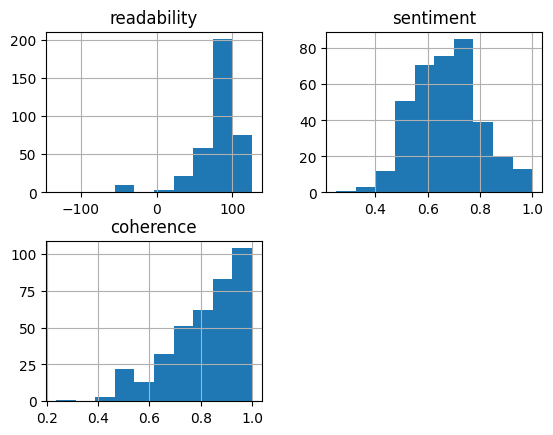

In [7]:
# plots for showing distribution of measures
df_arguments[["readability", "sentiment", "coherence"]].hist()

### Step 4: argument mining

In [8]:
from orangecontrib.argument.miner.miner import ArgumentMiner

df_arguments["topics"] = df_arguments["topics"].astype(str)
miner = ArgumentMiner(df_arguments)
last_topic = df_topics["topic"].max()
df_nodes = miner.select_by_topic(25)
df_edges = miner.get_edge_table(df_nodes)
df_nodes = miner.get_node_table(df_edges, df_nodes)
df_edges = miner.map_edge_tables(df_edges, df_nodes)
print("Last topic: %d" % last_topic)

Last topic: 31


In [9]:
df_edges.sort_values(by=["target", "source"])

,weight,source,target
5,0.007164,9,0
12,0.028591,16,0
13,0.038188,19,0
21,0.002637,9,1
28,0.024064,16,1
...,...,...,...
189,0.337891,16,22
192,0.338616,17,22
195,0.337159,18,22
198,0.347487,19,22


In [10]:
df_nodes.sort_values(by="label", ascending=False)

,argument,score,readability,topics,sentiment,coherence,argument_id,label
19,I liked these shoes a lot. Very light weight. ...,4,91.950000,"[25, 5, 17, 20]",0.743018,0.999878,309,supportive
6,Right one is slightly tight.. hope it will str...,4,117.160000,"[18, 25]",0.513393,0.869395,127,supportive
8,They run big. Order a full size smaller.,4,107.600000,"[25, 31]",0.543750,0.899112,171,supportive
9,A nice lightweight shoe. Not a lot of cushion ...,4,93.701618,"[3, 25]",0.637500,0.968855,203,supportive
16,Just too big otherwise I liked them!,4,90.958571,[25],0.687500,0.990282,271,supportive
12,I was really excited when I opened the box to ...,4,78.507424,"[9, 31, -1, 25]",0.546592,0.901732,254,supportive
0,ok but too big,3,118.175000,[25],0.625000,0.961691,12,defeated
14,I returned these as they were not true to size...,2,102.622115,"[27, 25]",0.509821,0.844705,267,defeated
21,These run large. I wear a 9.5 exactly in every...,5,86.070221,"[25, 10, 10, 19, 23, 0]",0.664113,0.754235,341,defeated
20,"Super cute shoe however runs wide and big, I'm...",3,83.324000,"[25, 10, -1]",0.530888,0.997618,331,defeated
